Installation der benötigten Bibliotheken:
1.  Tensorflow
2.  Numpy
3.  Matplotlib

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

Laden der Trainings und Testdaten

In [2]:
(train_picture, train_label), (test_picture, test_label) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


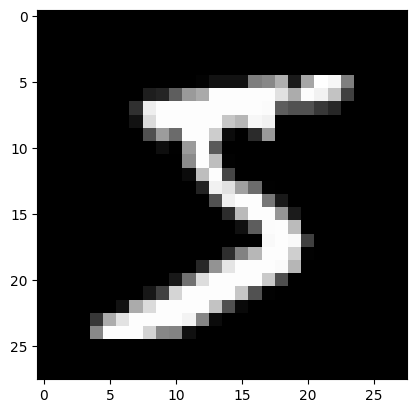

In [4]:
plt.imshow(train_picture[0], cmap="gray")

In [5]:
train_picture[0][15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

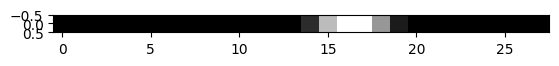

In [6]:
from matplotlib import pyplot as plt
plt.imshow(np.expand_dims(train_picture[0][15], axis=1).reshape(1, -1), cmap="gray")

Normalisierung der Graustufenwerte
1 - 255     ->      0 - 1

In [7]:
train_picture = train_picture / 255
test_picture = test_picture / 255

In [8]:
train_picture.shape[0]

60000

Hinzufügen einer Farbkanal-Dimension

In [9]:
train_picture = train_picture.reshape((train_picture.shape[0], 28, 28, 1))
test_picture = test_picture.reshape((test_picture.shape[0], 28, 28, 1))

Erstellen eines CNN Modells

In [10]:
model = models.Sequential([
   layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
   layers.MaxPooling2D((2, 2)),
   layers.Conv2D(64, (3, 3), activation="relu"),
   layers.Flatten(),
   layers.Dense(64, activation="relu"),
   layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,146 (1.97 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_picture, train_label, epochs=5, validation_data=(test_picture, test_label))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9220 - loss: 0.2505 - val_accuracy: 0.9830 - val_loss: 0.0498
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9868 - loss: 0.0411 - val_accuracy: 0.9872 - val_loss: 0.0398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.9883 - val_loss: 0.0373
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.9909 - val_loss: 0.0299
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9890 - val_loss: 0.0406


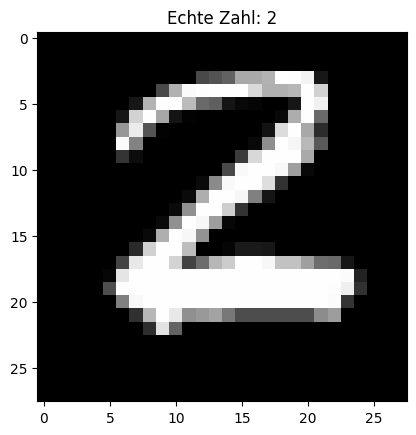

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Vorhergesagte Zahl: 2


In [50]:
random_idx = np.random.randint(0, len(test_picture))
# Wählt einen zufälligen Index aus dem Testdatensatz.
plt.imshow(test_picture[random_idx].reshape(28, 28), cmap='gray')
# Zeigt das ausgewählte Bild in Graustufen an.
plt.title(f"Echte Zahl: {test_label[random_idx]}")
# Fügt dem Bild die tatsächliche Zahl als Titel hinzu.
plt.show()

# Vorhersage
predicted = model.predict(test_picture[random_idx].reshape(1, 28, 28, 1))
# Führt eine Vorhersage auf dem ausgewählten Bild durch. Das Bild muss die Form (1, 28, 28, 1) haben.
print(f"Vorhergesagte Zahl: {np.argmax(predicted)}")